In [195]:
# TAREA 4
# integrantes
# Polo Figueroa
# David Gabriel
# Pablo Santa Maria

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


In [196]:
# VALORES DE LOS PARAMETROS
beta = 0.98
sigma = 1.5
T = 70
A_0 = 0
A_T = 0

In [197]:
# PROBLEMA 1

def U_t(C):    
    if sigma ==1:
        return np.log(C)
    else:
        return (C**(1-sigma)-1)/(1-sigma)

def messi_func(A_vec):
    A_vec_lag = np.append(A_0,A_vec)
    A_vec = np.append(A_vec,A_T)
    C_vec = R*A_vec_lag+Y-A_vec
    beta_vec = beta**np.arange(0,T+1)
    bienestar = sum(beta_vec*U_t(C_vec))
    return -bienestar

In [299]:
def f(Y,phi):

    #VALOR PRESENTE
    # valor presente del ingreso
    Y_bar = sum( Y/(R**np.arange(0,T+1)))

    #Consumo
    C0 = ((1-beta)/(1-beta**(T+1)))*Y_bar
    C_initval = ((beta*R)**np.arange(0,T+1))*C0

    #Activos
    A_initval = np.ones(T)
    A_initval[0] = R*A_0+Y[0]-C_initval[0]
    for t in range(1,T):
        A_initval[t]=R*A_initval[t-1]+Y[t]-C_initval[t]

    #OPTIMIZACION RESTRINGIDA
    A_bound = -phi
    x0 = np.ones(len(A_initval))
    for i in range(0,len(A_initval)):
        x0[i]=max(A_bound,A_initval[i])

    lb = np.repeat(A_bound,len(A_initval))    
    ub = np.repeat(None,len(A_initval))
    BOUNDS = np.vstack((lb,ub)).T
    A_t = minimize(messi_func,x0, method="L-BFGS-B", bounds=BOUNDS).x
    A_t = np.append(A_t,A_T)

    C_t = np.ones(T)
    for t in range(0,T):
        if t==0:
            C_t[0]=A_0*R+Y[0]-A_t[0]
        else:
            C_t[t]=A_t[t-1]*R+Y[t]-A_t[t]
    return [A_t,C_t]


In [300]:
#PROBLEMA 2

Y = np.ones(T+1)
phi = np.Inf

# (a)
R = 1/beta
A1 , C1 = f(Y,phi)

# (b) 
R = 1/beta-0.02
A2 , C2 = f(Y,phi)

# (c)
R = 1/beta+0.02  
A3 , C3 = f(Y,phi)


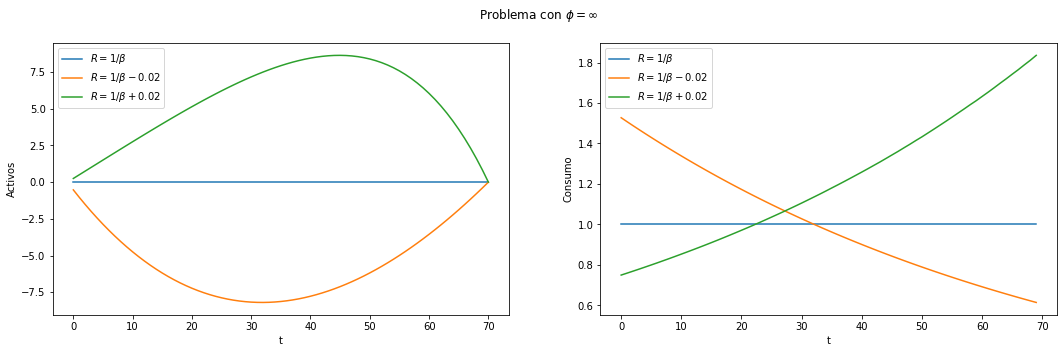

In [302]:
fig, ax = plt.subplots(1,2,figsize=(18,5))

fig.suptitle(r'Problema con $\phi = \infty$')
ax[0].plot(A1,'-',label=r'$R = 1/ \beta$')
ax[0].plot(A2,'-',label=r'$R = 1/ \beta - 0.02 $')
ax[0].plot(A3, label = r'$R = 1/ \beta + 0.02$')
ax[0].legend()
ax[0].set_ylabel('Activos')
ax[0].set_xlabel('t')

ax[1].plot(C1,'-',label=r'$R = 1/ \beta$')
ax[1].plot(C2,'-',label=r'$R = 1/ \beta - 0.02$')
ax[1].plot(C3, label = r'$R = 1/ \beta + 0.02 $')
ax[1].legend()
ax[1].set_ylabel('Consumo')
ax[1].set_xlabel('t')
plt.savefig('Problema2.pdf')

In [304]:
#PROBLEMA 3

Y = np.ones(T+1)
phi = 0

# (a)
R = 1/beta
A1 , C1 = f(Y,phi)

# (b) 
R = 1/beta-0.02
A2 , C2 = f(Y,phi)

# (c)
R = 1/beta+0.02  
A3 , C3 = f(Y,phi)


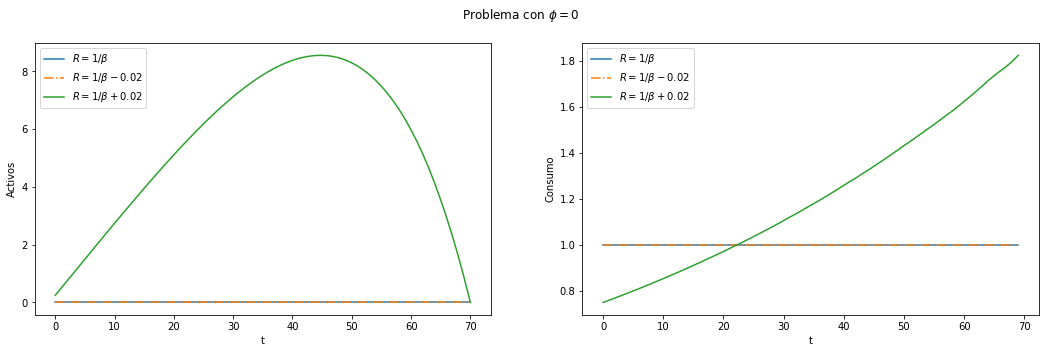

In [305]:
fig, ax = plt.subplots(1,2,figsize=(18,5))

fig.suptitle(r'Problema con $\phi = 0$')
ax[0].plot(A1,'-',label=r'$R = 1/ \beta$')
ax[0].plot(A2,'-.',label=r'$R = 1/ \beta - 0.02 $')
ax[0].plot(A3, label = r'$R = 1/ \beta + 0.02$')
ax[0].legend()
ax[0].set_ylabel('Activos')
ax[0].set_xlabel('t')

ax[1].plot(C1,'-',label=r'$R = 1/ \beta$')
ax[1].plot(C2,'-.',label=r'$R = 1/ \beta - 0.02$')
ax[1].plot(C3, label = r'$R = 1/ \beta + 0.02 $')
ax[1].legend()
ax[1].set_ylabel('Consumo')
ax[1].set_xlabel('t')
plt.savefig('Problema3.pdf')

In [323]:
#PROBLEMA 4
np.random.seed(seed=15)
Y = np.ones(T+1)
R = 1/beta-0.02
mu = 1
rho = 0.8
sigma_e = 0.2
epsilon = np.random.normal(0,0.2,size = len(Y))
for t in range(1,len(Y)):
    Y[t]=mu*(1-rho)+rho*Y[t-1]+epsilon[t]
   

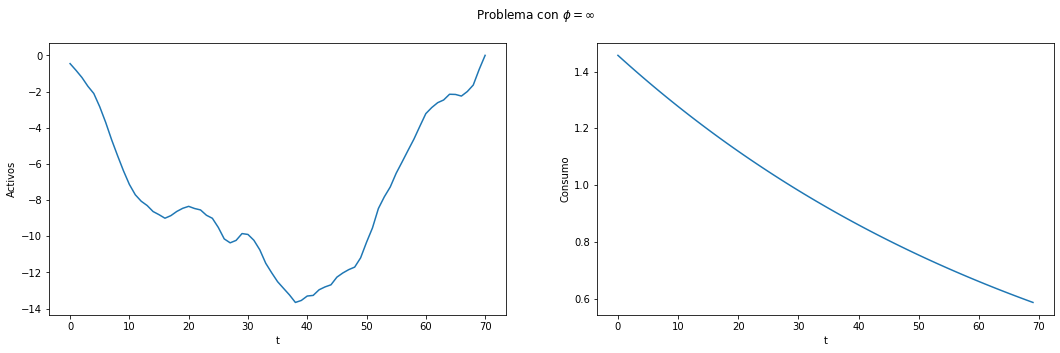

In [308]:
# (a)
phi = np.Inf
A_t , C_t = f(Y,phi)

C_t = np.zeros(T)
for t in range(0,T):
    if t==0:
        C_t[t]=A_0*R+Y[t]-A_t[0]
    else:
        C_t[t]=A_t[t-1]*R+Y[t]-A_t[t]

fig, ax = plt.subplots(1,2,figsize=(18,5))

fig.suptitle(r'Problema con $\phi = \infty$')
ax[0].plot(A_t,'-')
ax[0].set_ylabel('Activos')
ax[0].set_xlabel('t')

ax[1].plot(C_t,'-')
ax[1].set_ylabel('Consumo')
ax[1].set_xlabel('t')
plt.savefig('problema4A.pdf')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys


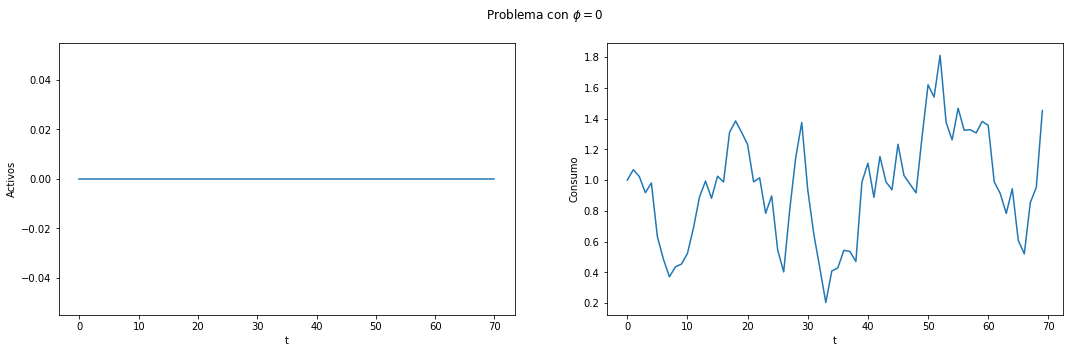

In [310]:
# (b)
phi = 0
A_t , C_t = f(Y,phi)
fig, ax = plt.subplots(1,2,figsize=(18,5))

fig.suptitle(r'Problema con $\phi = 0$')
ax[0].plot(A_t,'-')
ax[0].set_ylabel('Activos')
ax[0].set_xlabel('t')

ax[1].plot(C_t,'-')
ax[1].set_ylabel('Consumo')
ax[1].set_xlabel('t')
plt.savefig('Problema4B.pdf')

In [ ]:
# (c)

# (c.1)
phi = np.Inf
AA = []
CC = []

for i in range(1000):
    Y = np.ones(T+1)
    R = 1/beta-0.02
    mu = 1
    rho = 0.8
    sigma_e = 0.2
    epsilon = np.random.normal(0,0.2,size = len(Y))
    for t in range(1,len(Y)):
        Y[t]=mu*(1-rho)+rho*Y[t-1]+epsilon[t]
    A_t , C_t = f(Y,phi)
    AA.append(A_t)
    CC.append(C_t)
AA = np.array(AA)
CC = np.array(CC)

PROMEDIO_A=np.ones(T)
PROMEDIO_C=np.ones(T)

for t in range(T):
    PROMEDIO_A[t]=np.average(AA.T[t][AA.T[t]!=0])
    PROMEDIO_C[t]=np.average(CC.T[t][CC.T[t]!=0])



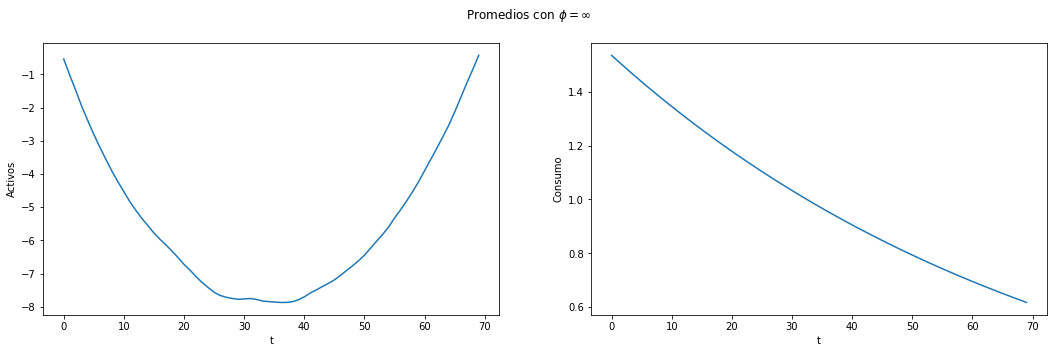

In [318]:
fig, ax = plt.subplots(1,2,figsize=(18,5))
fig.suptitle(r'Promedios con $\phi = \infty$')
ax[0].plot(PROMEDIO_A)
ax[0].set_ylabel('Activos')
ax[0].set_xlabel('t')

ax[1].plot(PROMEDIO_C)
ax[1].set_ylabel('Consumo')
ax[1].set_xlabel('t')
plt.savefig('Problema4C1.pdf')

In [319]:
# (c.2)
phi = 0
AA = []
CC = []

for i in range(100):
    Y = np.ones(T+1)
    R = 1/beta-0.02
    mu = 1
    rho = 0.8
    sigma_e = 0.2
    epsilon = np.random.normal(0,0.2,size = len(Y))
    for t in range(1,len(Y)):
        Y[t]=mu*(1-rho)+rho*Y[t-1]+epsilon[t]
    A_t , C_t = f(Y,phi)
    AA.append(A_t)
    CC.append(C_t)

AA = np.array(AA)
CC = np.array(CC)

PROMEDIO_A=np.ones(T)
PROMEDIO_C=np.ones(T)

for t in range(T):
    PROMEDIO_A[t]=np.average(AA.T[t][AA.T[t]!=0])
    PROMEDIO_C[t]=np.average(CC.T[t][CC.T[t]!=0])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys


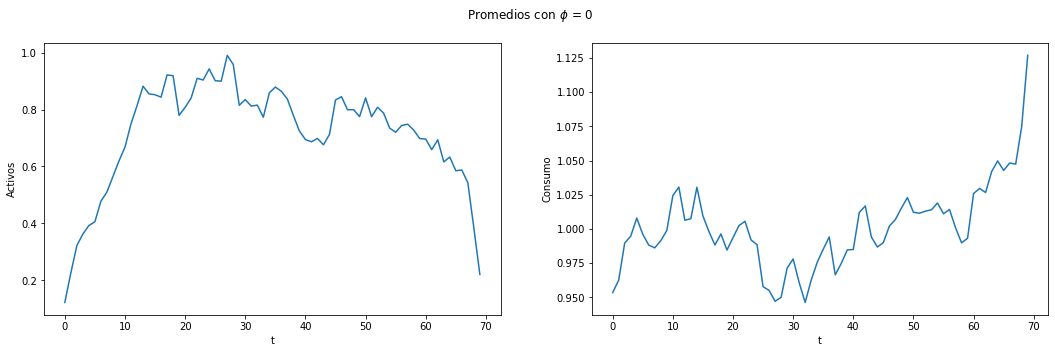

In [322]:
fig, ax = plt.subplots(1,2,figsize=(18,5))
fig.suptitle(r'Promedios con $\phi$ = 0')
ax[0].plot(PROMEDIO_A)
ax[0].set_ylabel('Activos')
ax[0].set_xlabel('t')

ax[1].plot(PROMEDIO_C)
ax[1].set_ylabel('Consumo')
ax[1].set_xlabel('t')
plt.savefig('Problema4C2.pdf')